In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def relation(cause_morte):
    morti=pd.read_csv('../csv/Morti_province_definitivo.csv', encoding='utf-8')

    morti.drop(morti.index[(morti["TIPO_DATO15"]=="DEATH")], axis=0, inplace=True)
    morti.drop(morti.index[(morti["Causa iniziale di morte - European Short List"]!=cause_morte)], axis=0, inplace=True)
    morti.drop(morti.index[(morti["Sesso"]!="totale")], axis=0, inplace=True)
    return morti

In [67]:
def provinces():
    inq_prov=pd.read_csv('../csv/Foglio_Chino.csv', encoding='utf-8', sep=',')
    inq_prov=inq_prov.rename(columns={"Unnamed: 0":"Territorio","Unnamed: 1":"VOTO","2018":"Pm10 2018","Unnamed: 3":"Pm2.5 2018",
    "Unnamed: 4":"NO2 2018","2017":"Pm10 2017","Unnamed: 6":"Pm2.5 2017", "Unnamed: 7":"NO2 2017",
    "2016":"Pm10 2016","Unnamed: 9":"Pm2.5 2016", "Unnamed: 10":"NO2 2016",
    "2015":"Pm10 2015","Unnamed: 12":"Pm2.5 2015", "Unnamed: 13":"NO2 2015",
    "2014":"Pm10 2014","Unnamed: 15":"Pm2.5 2014", "Unnamed: 16":"NO2 2014"})
    
    #skipped first row
    inq_prov=inq_prov.iloc[1:]
    
    
    inq_prov.drop(inq_prov.index[(inq_prov["Pm10 2018"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["Pm2.5 2018"]=="nd")], axis=0, inplace=True)
    inq_prov.drop(inq_prov.index[(inq_prov["NO2 2018"]=="nd")], axis=0, inplace=True)
    return inq_prov

inq_prov=provinces()
inq_prov

,Territorio,VOTO,Pm10 2018,Pm2.5 2018,NO2 2018,Pm10 2017,Pm2.5 2017,NO2 2017,Pm10 2016,Pm2.5 2016,NO2 2016,Pm10 2015,Pm2.5 2015,NO2 2015,Pm10 2014,Pm2.5 2014,NO2 2014
2,Alessandria,3,35,22,28,40,26,37,32,21,33,37,24,27,35,22,29
3,Ancona,3,28,13,17,25,15,15,26,14,25,30,17,25,25,nd,20
4,Aosta,6,17,12,24,20,13,29,18,12,27,20,12,28,20,13,28
5,Arezzo,3,21,13,26,22,13,28,22,13,18,27,16,29,24,14,28
6,Ascoli Piceno,5,20,12,15,19,13,17,19,13,13,22,12,16,22,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Vercelli,3,30,18,26,36,23,25,30,20,28,37,27,38,34,nd,34
101,Verona,3,31,21,26,33,23,29,30,22,26,33,26,32,27,21,29
102,Vibo Valentia,5,21,9,15,21,9,15,21,9,15,23,14,11,nd,nd,nd
103,Vicenza,3,32,24,32,37,28,37,34,24,34,39,29,39,32,22,35


In [68]:
def pollution_choose(dataset1, dataset2, pollutant):

    result=pd.merge(dataset1, dataset2, on="Territorio")
    pollutant_year=pollutant + " 2018"
    result.sort_values(by=[pollutant_year], inplace=True)
    result.plot.scatter(x=pollutant_year, y="Value")
    plt.show()
    


In [69]:
morti=pd.read_csv('../csv/Morti_province_definitivo.csv', encoding='utf-8')
s=morti['Causa iniziale di morte - European Short List'].unique()
for x in s:
    print(x)

di cui tumori maligni della trachea, dei bronchi e dei polmoni
di cui tumori maligni della prostata
du cui altre malattie ischemiche del cuore
altre malattie del sistema circolatorio
polmonite
altre malattie del sistema nervoso e degli organi di senso
di cui tumori maligni del cervello e del sistema nervoso centrale
di cui leucemia
tumori non maligni (benigni e di comportamento incerto)
di cui altre malattie croniche delle basse vie respiratorie
di cui morbo di hodgkin e linfomi
di cui altri tumori maligni
di cui altri tumori maligni del tessuto linfatico/ematopoietico
malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario
altre malattie del sistema respiratorio
di cui tumori maligni dello stomaco
di cui tumori maligni del pancreas
di cui melanomi maligni della cute
malattia di alzheimer
diabete mellito
di cui tumori maligni del fegato e dei dotti biliari intraepatici
morbo di parkinson
di cui tumori maligni dell'esofago
tubercolosi
di cui tumori ma

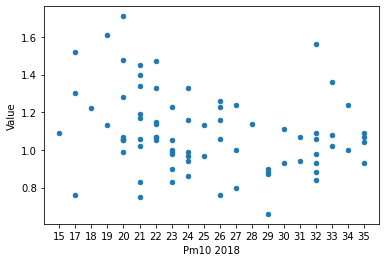

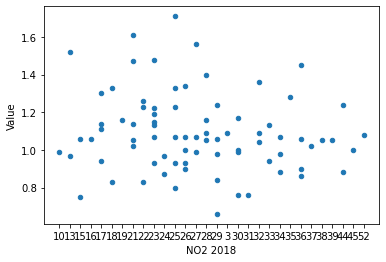

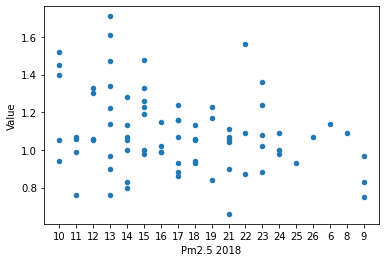

In [70]:
#leucemia
morti=relation("di cui leucemia") #sarebbe utile al posto di mettere un codice, avere la scelta a tendina
pollution_choose(morti, inq_prov, "Pm10")
pollution_choose(morti, inq_prov, "NO2")
pollution_choose(morti, inq_prov, "Pm2.5")

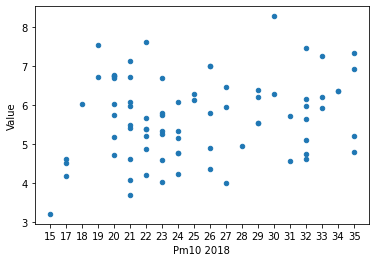

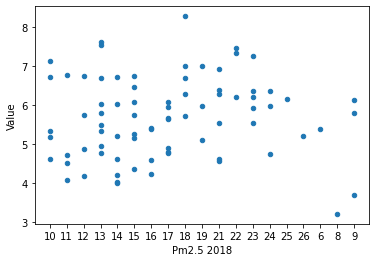

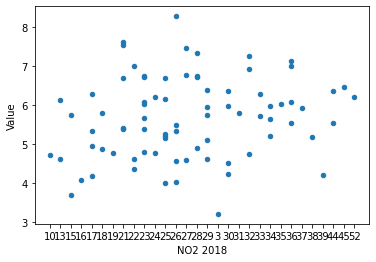

In [71]:
#di cui tumori maligni della trachea, dei bronchi e dei polmoni
morti2=relation("di cui tumori maligni della trachea, dei bronchi e dei polmoni") 
pollution_choose(morti2, inq_prov, "Pm10")#
pollution_choose(morti2, inq_prov, "Pm2.5")#
pollution_choose(morti2, inq_prov, "NO2")#

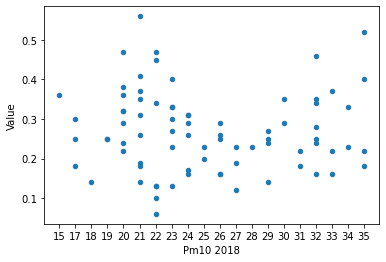

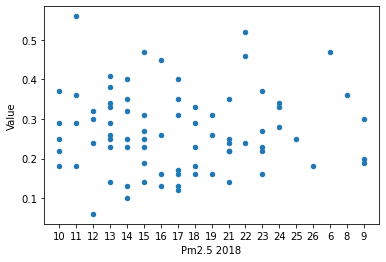

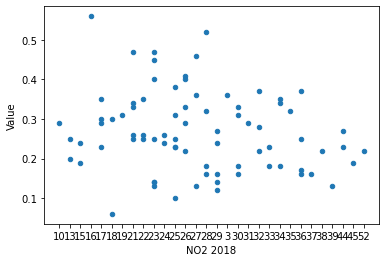

In [72]:
#di cui tumori maligni della laringe
morti3=relation("di cui tumori maligni della laringe") 
pollution_choose(morti3, inq_prov, "Pm10")
pollution_choose(morti3, inq_prov, "Pm2.5")
pollution_choose(morti3, inq_prov, "NO2")

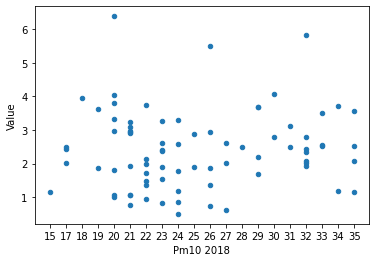

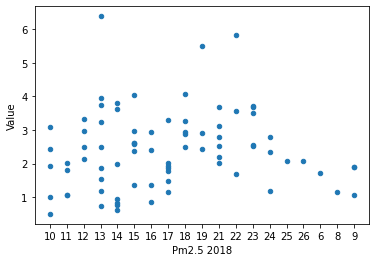

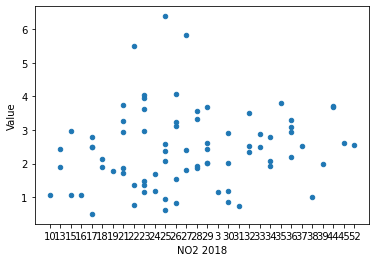

In [73]:
#polmonite
morti4=relation("polmonite") 
pollution_choose(morti4, inq_prov, "Pm10")
pollution_choose(morti4, inq_prov, "Pm2.5")
pollution_choose(morti4, inq_prov, "NO2")

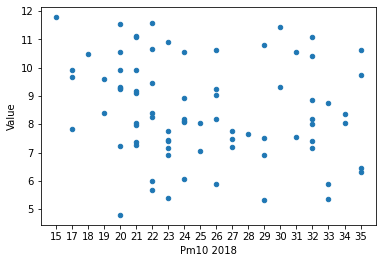

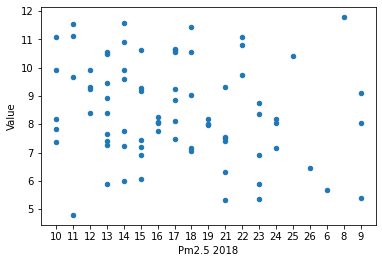

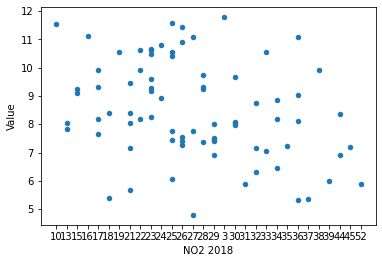

In [80]:
#altre malattie del sistema circolatorio
morti5=relation("altre malattie del sistema circolatorio") 
pollution_choose(morti5, inq_prov, "Pm10")
pollution_choose(morti5, inq_prov, "Pm2.5")
pollution_choose(morti5, inq_prov, "NO2")

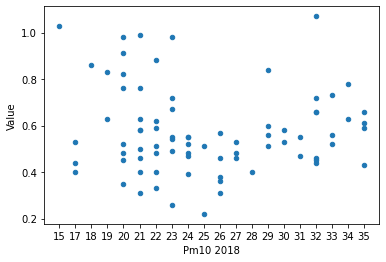

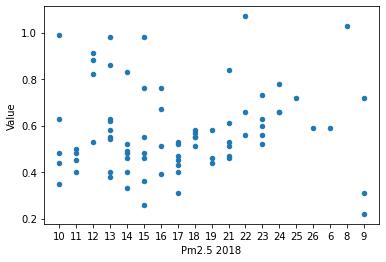

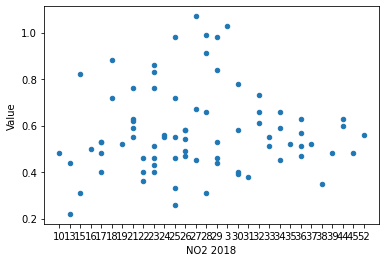

In [81]:
#di cui tumori maligni delle labbra, cavità orale e faringe
morti6=relation("di cui tumori maligni delle labbra, cavità orale e faringe") 
pollution_choose(morti6, inq_prov, "Pm10")#
pollution_choose(morti6, inq_prov, "Pm2.5")#
pollution_choose(morti6, inq_prov, "NO2")

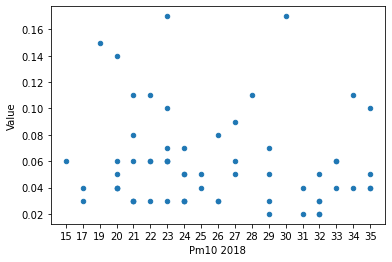

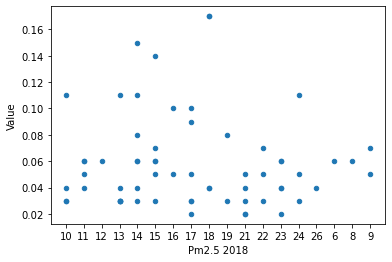

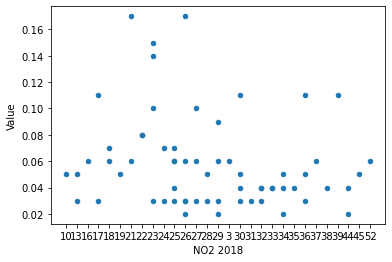

In [82]:
#tubercolosi
morti7=relation("tubercolosi") 
pollution_choose(morti7, inq_prov, "Pm10")
pollution_choose(morti7, inq_prov, "Pm2.5")
pollution_choose(morti7, inq_prov, "NO2")

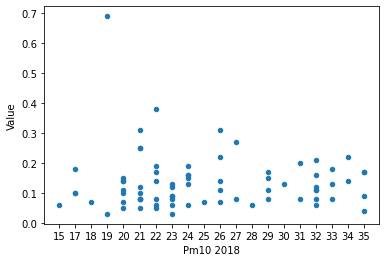

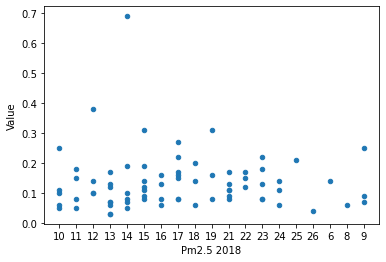

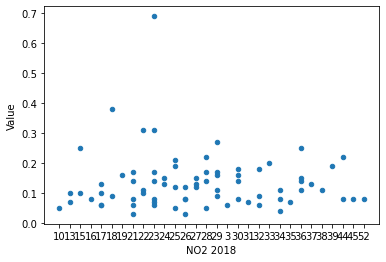

In [83]:
#influenza
morti8=relation("influenza") 
pollution_choose(morti8, inq_prov, "Pm10")
pollution_choose(morti8, inq_prov, "Pm2.5")
pollution_choose(morti8, inq_prov, "NO2")

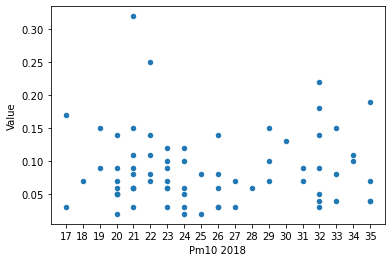

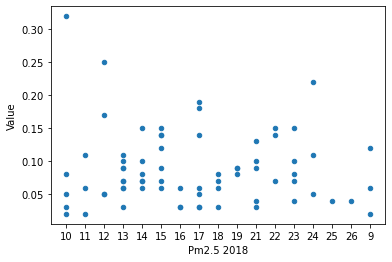

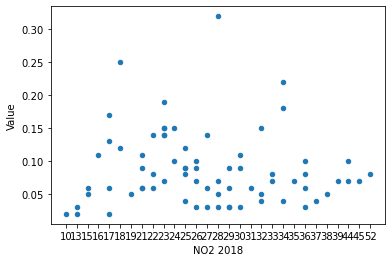

In [84]:
#di cui asma
morti9=relation("di cui asma") 
pollution_choose(morti9, inq_prov, "Pm10")
pollution_choose(morti9, inq_prov, "Pm2.5")
pollution_choose(morti9, inq_prov, "NO2")

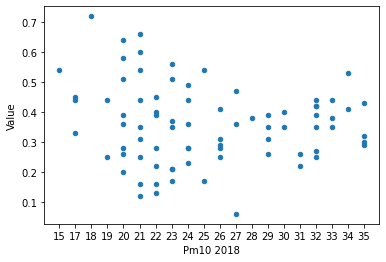

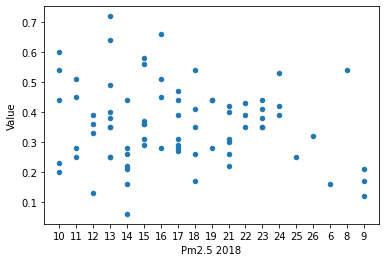

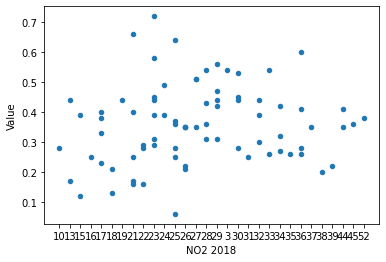

In [86]:
#di cui melanomi maligni della cute
morti10=relation("di cui melanomi maligni della cute") 
pollution_choose(morti10, inq_prov, "Pm10")
pollution_choose(morti10, inq_prov, "Pm2.5")
pollution_choose(morti10, inq_prov, "NO2")

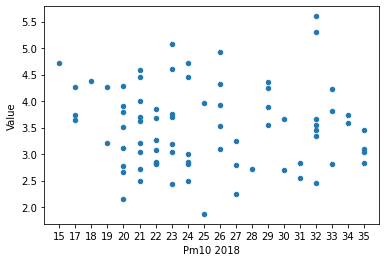

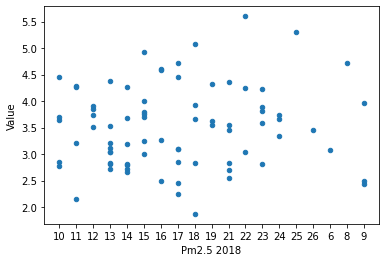

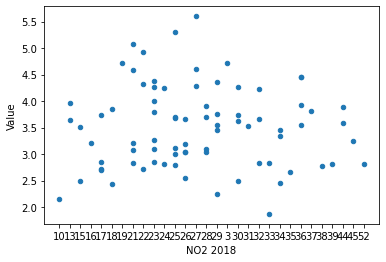

In [87]:
#di cui infarto miocardico acuto
morti11=relation("di cui infarto miocardico acuto") 
pollution_choose(morti11, inq_prov, "Pm10")
pollution_choose(morti11, inq_prov, "Pm2.5")
pollution_choose(morti11, inq_prov, "NO2")

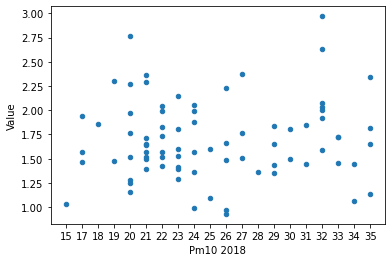

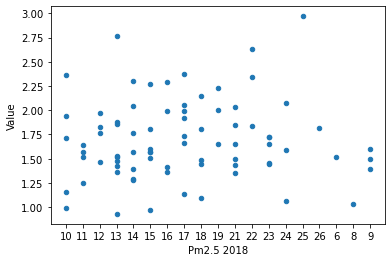

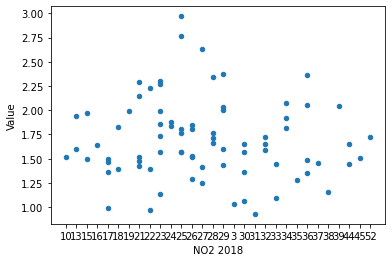

In [88]:
#tumori non maligni (benigni e di comportamento incerto)
morti12=relation("tumori non maligni (benigni e di comportamento incerto)") 
pollution_choose(morti12, inq_prov, "Pm10")
pollution_choose(morti12, inq_prov, "Pm2.5")
pollution_choose(morti12, inq_prov, "NO2")

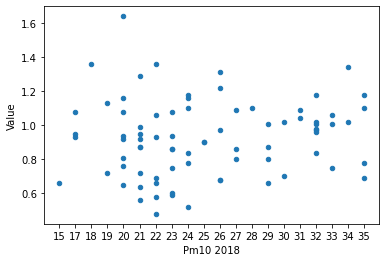

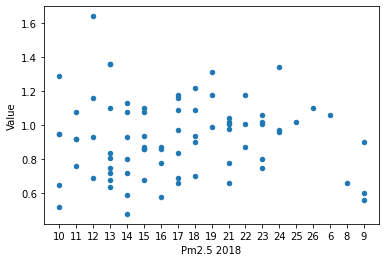

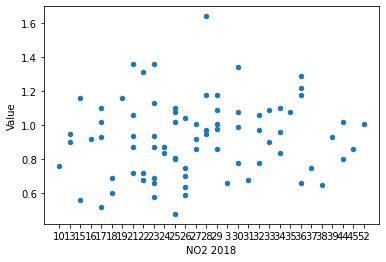

In [89]:
#di cui morbo di hodgkin e linfomi
morti13=relation("di cui morbo di hodgkin e linfomi") 
pollution_choose(morti13, inq_prov, "Pm10")
pollution_choose(morti13, inq_prov, "Pm2.5")
pollution_choose(morti13, inq_prov, "NO2")

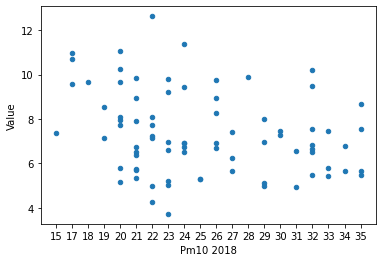

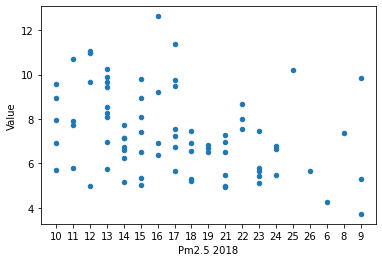

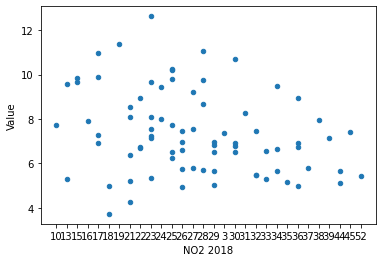

In [90]:
#du cui altre malattie ischemiche del cuore
morti14=relation("du cui altre malattie ischemiche del cuore") 
pollution_choose(morti14, inq_prov, "Pm10")
pollution_choose(morti14, inq_prov, "Pm2.5")
pollution_choose(morti14, inq_prov, "NO2")

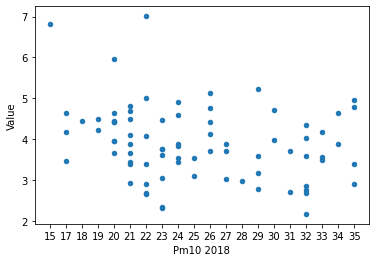

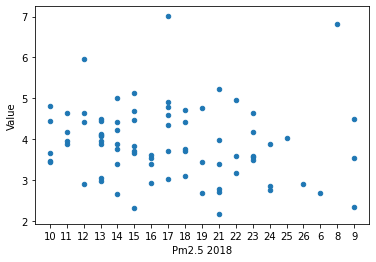

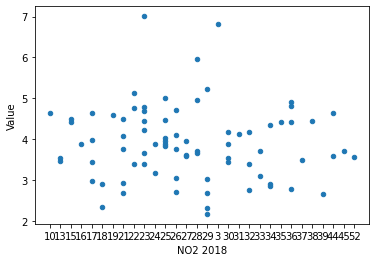

In [91]:
#di cui altre malattie croniche delle basse vie respiratorie
morti15=relation("di cui altre malattie croniche delle basse vie respiratorie") 
pollution_choose(morti15, inq_prov, "Pm10")
pollution_choose(morti15, inq_prov, "Pm2.5")
pollution_choose(morti15, inq_prov, "NO2")

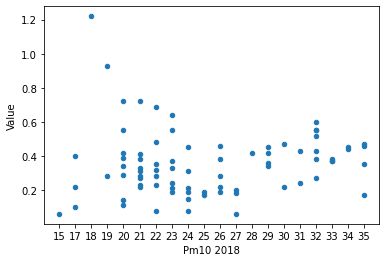

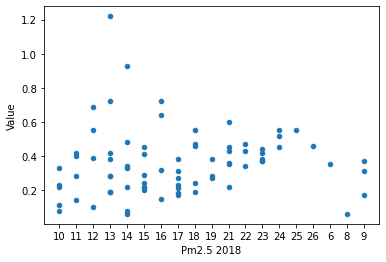

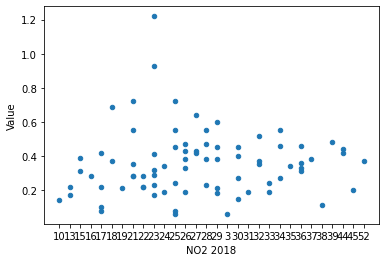

In [92]:
#di cui tumori maligni dell'esofago
morti16=relation("di cui tumori maligni dell'esofago") 
pollution_choose(morti16, inq_prov, "Pm10")
pollution_choose(morti16, inq_prov, "Pm2.5")
pollution_choose(morti16, inq_prov, "NO2")